# Notebook to Visualize Positions of Egyptian Decans with decanOpy

Everything is better with Python. 

In [49]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd
import matplotlib.pyplot as plt
import math

import star_chart_spherical_projection as scsp
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun, Angle, Longitude
from sunpy.coordinates import frames, sun

# I want get_sun to shut up so ignoring warnings:

import warnings

warnings.simplefilter('ignore', UserWarning)


## Analysis Functions

In [50]:

def SunRiseSet(jd, SunAlt, deg):
    
    '''
    A function to create a list of indices where the Sun rises and sets in a given year. 
    This is useful for making sure we're tracking nightly, visible motion of the decans.
    Inputs: 
        jd = Julian date
        SunAlt = the altitude of the Sun
    Outputs:
        sunriseset = indices of sunrize and sunset in the jd & date columns
    '''
    
    sunriseset = []
    for i in range(360, len(jd), 360):
        temp = []
        for j in range(i - 360, i):
            if SunAlt[j] <= deg + 0.4 and SunAlt[j] >= deg - 0.4:
                if len(temp) == 0: 
                    temp.append(j)
                elif temp[-1] != j - 1:
                    temp.append(j)
        sunriseset.append(temp)
    return sunriseset




# def nightHourLength(jd, sunriseset):
#     hrlen = [];
#     dhour = 0.04166666674427688

#     for i in sunriseset:
#         night = jd[i[1]] - jd[i[0]]
#         hrlen.append((night/dhour) * (60/12))
#     return(hrlen)


def nightHourLength(jd, sunrise, sunset):
    hrlen = [];
    dhour = 0.04166666674427688

    for i in range(0,len(sunrise)-1):
        night = jd[sunrise[i + 1][0]] - jd[sunset[i][1]]
        hrlen.append((night/dhour) * (60/12))
    return(hrlen)
# Import Decan Data

def ImportDecanData(direct, filename):
    
    '''
    A function to import data from a decanOpy-generated .txt file. 
    Inputs: 
        direct = string with the directory where the .txt file is located
        filename = string with name of file (name + month + year)
    Outputs:
        jd = Julian date
        date = human readable date
        DecAz = the azimuth of the decan
        DecAlt = the altitude of the decan
        SunAz = the azimuth of the Sun
        SunAlt = the altitude of the Sun
    '''
    
    jd = []
    date = []
    DecAz = []
    DecAlt = []
    SunAz = []
    SunAlt = []
    # Import Single Object
    with open(direct + filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter='|')
        decan = next(csv_reader)[0]
        location = next(csv_reader)[0]
        trash = next(csv_reader)
        headers = next(csv_reader)
        for row in csv_reader:
            # time info
            jd.append(float(row[0]))
            date.append(row[1])
            # decan info
            DecAz.append(float(row[2][0:-4]))
            DecAlt.append(float(row[3][0:-4]))
            # solar info
            SunAz.append(float(row[4][0:-4]))
            SunAlt.append(float(row[5][0:-4]))
    return(jd, date, DecAz, DecAlt, SunAz, SunAlt)

## Sun Data Processing

In [ ]:
### Set the directory

direct = os.getcwd() # current working directory
direct = direct + '/DecanLists' # directory where the .txt files go

### Determine the filenames

Sirius_filename = ['/Sirius011300BC.txt']
Orion_filename = ['/Rigel011300BC.txt', '/Betelgeuse011300BC.txt']
Dipper_filename = ['/Alkaid011300BC.txt', '/Alioth011300BC.txt', '/Merak011300BC.txt']

# Sirius
(jd, date, SiriusAz, SiriusAlt, SunAz, SunAlt) = ImportDecanData(direct, Sirius_filename[0])
# absolute worst way to import excel data but eh it's a one off 

excelData = '''23.590944
29.48868
29.48868
29.48868
29.48868
32.7652
39.31824
39.31824
39.31824
39.31824
39.31824
39.31824
39.31824
44.23302
44.23302
44.23302
44.23302
44.23302
44.23302
44.23302
44.23302
44.23302
44.67981818
45.87128
45.87128
46.69041
46.69041
47.181888
47.181888
47.181888
47.181888
47.181888
48.05562667
49.1478
49.1478
49.1478
50.55202286
50.55202286
50.55202286
50.55202286
51.60519
51.60519
52.42432
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736
58.97736'''

RSCData = [ float(value) for value in excelData.split('\n') ]

# Night hour length plots

## Symmetric sunrise / sunset

In [55]:
### Sunrise & Sunset Times

sunriseset0 = SunRiseSet(jd, SunAlt, 0)
hrlen0 = nightHourLength(jd, sunriseset0, sunriseset0) 

sunriseset5 = SunRiseSet(jd, SunAlt, -5)
hrlen5 = nightHourLength(jd, sunriseset5, sunriseset5) 

sunriseset10 = SunRiseSet(jd, SunAlt, -10)
hrlen10 = nightHourLength(jd, sunriseset10, sunriseset10) 

sunriseset15 = SunRiseSet(jd, SunAlt, -15)
hrlen15 = nightHourLength(jd, sunriseset15, sunriseset15) 

sunriseset20 = SunRiseSet(jd, SunAlt, -20)
hrlen20 = nightHourLength(jd, sunriseset20, sunriseset20) 

# make one numpy array for plotting 
dOpyData = np.column_stack([hrlen0, hrlen5, hrlen10, hrlen15, hrlen20])

# plotting bins
binrange = range(20, 80, 4)

<function matplotlib.pyplot.show(close=None, block=None)>

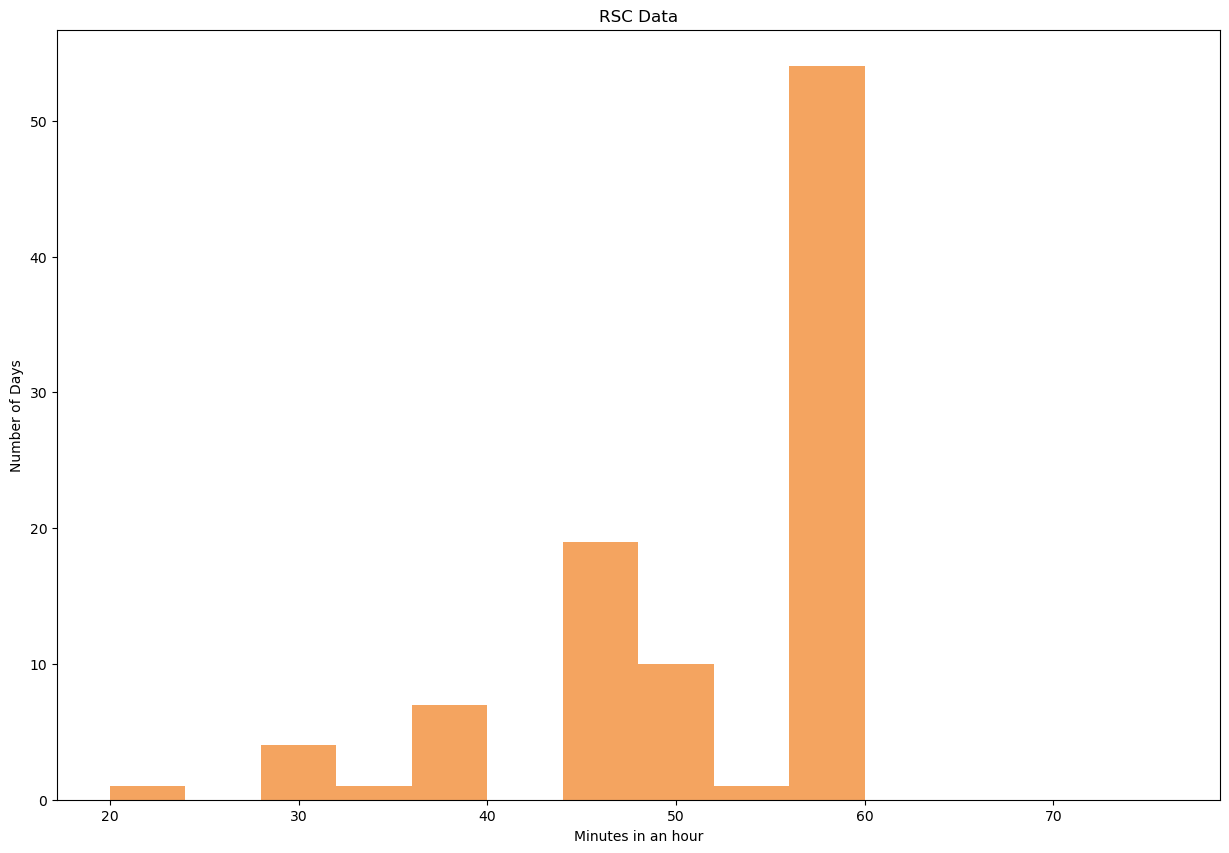

In [56]:
plt.hist(RSCData, color = "sandybrown", bins=binrange)
plt.xlabel("Minutes in an hour")
plt.ylabel("Number of Days")
plt.title("RSC Data")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

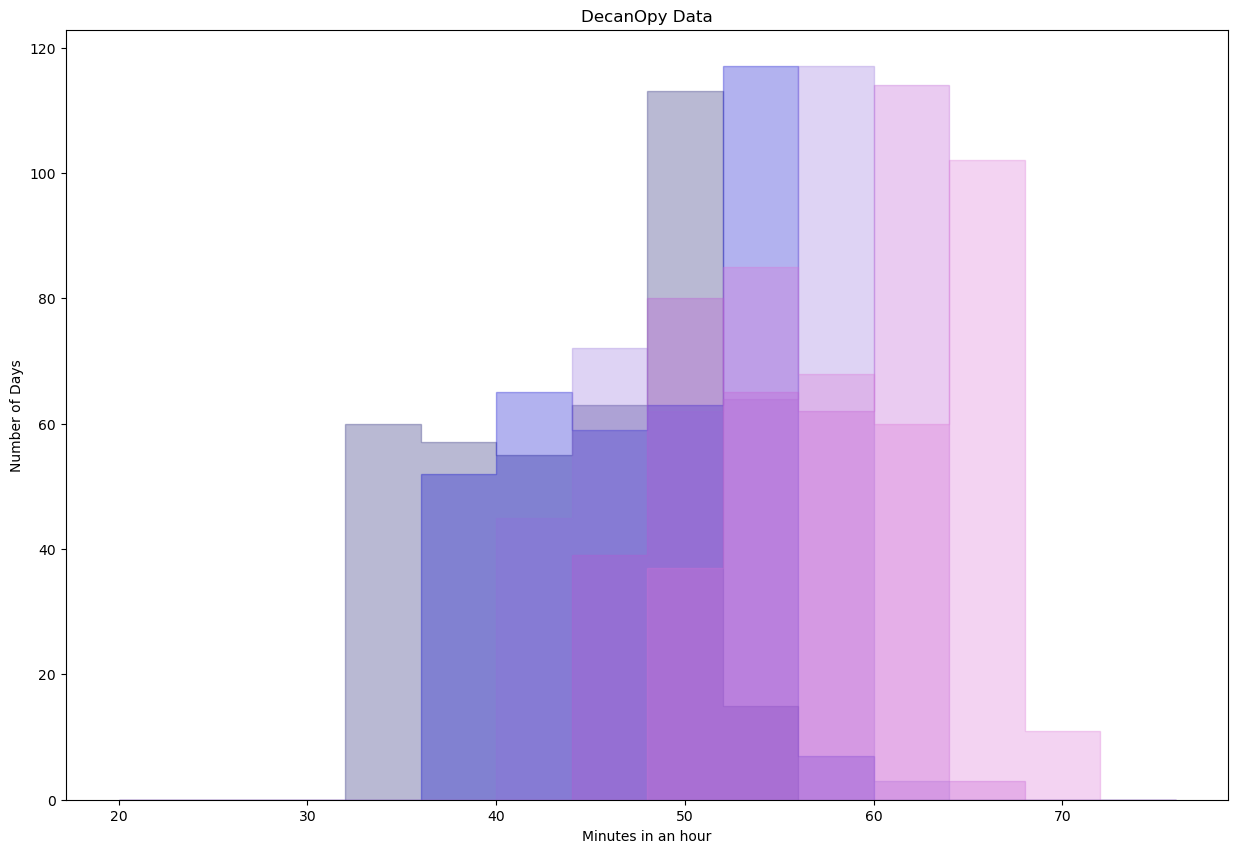

In [57]:
histcols = ["orchid","mediumorchid","mediumpurple","mediumblue", "midnightblue"]

plt.hist(dOpyData, bins=binrange, color=histcols, histtype='step', stacked = False, fill=True, alpha=0.3)
plt.xlabel("Minutes in an hour")
plt.ylabel("Number of Days")
plt.title("DecanOpy Data")

cmap = plt.get_cmap('cool')
plt.set_cmap(cmap)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

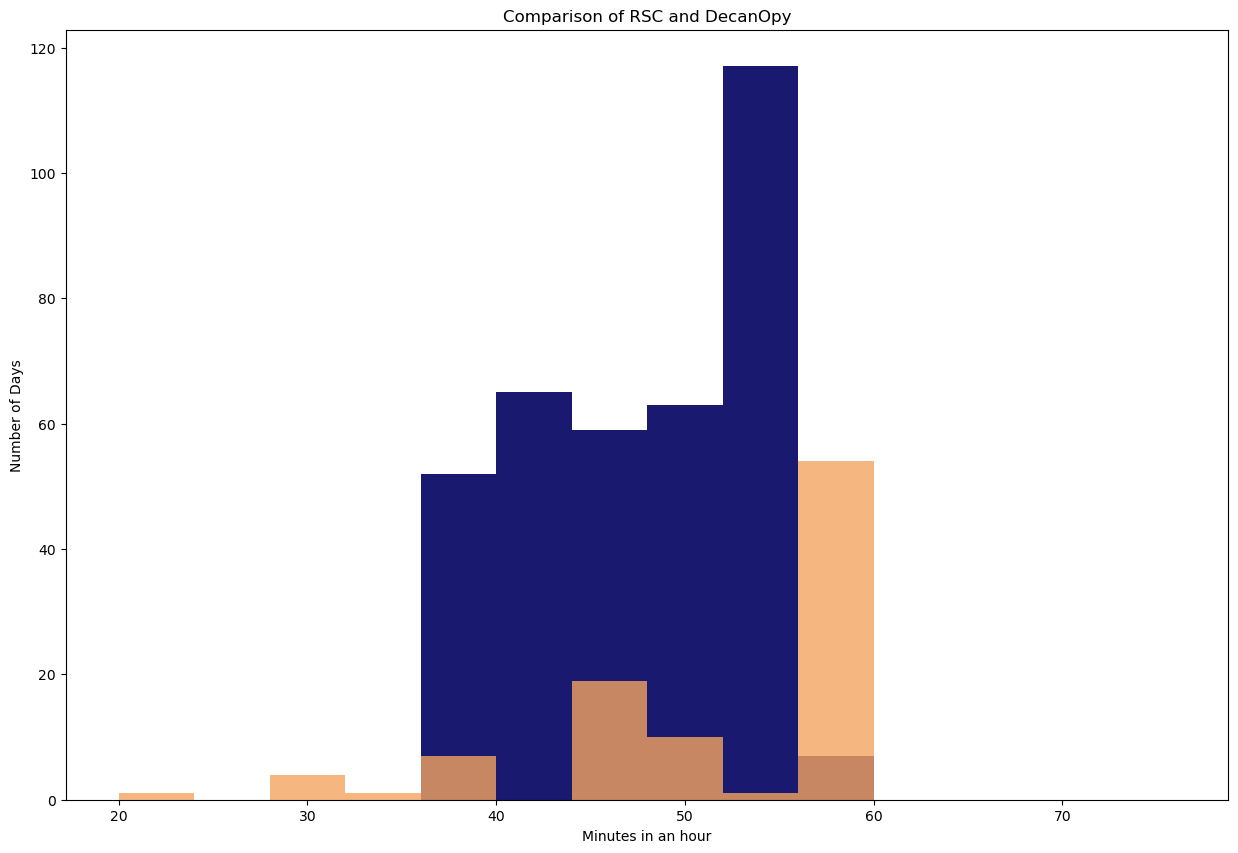

In [59]:
# plotting bins
binrange = range(20, 80, 4)

plt.hist(hrlen15, color = "midnightblue",  bins=binrange)
plt.hist(RSCData, color = "sandybrown",  bins=binrange, alpha = 0.8)
plt.xlabel("Minutes in an hour")
plt.ylabel("Number of Days")
plt.title("Comparison of RSC and DecanOpy")
plt.show

## Asymmetric sunrise / sunset

In [60]:
### Sunrise & Sunset Times
sunriseset10 = SunRiseSet(jd, SunAlt, -10)
sunriseset15 = SunRiseSet(jd, SunAlt, -15)
sunriseset20 = SunRiseSet(jd, SunAlt, -20)


hrlenrise10set15 = nightHourLength(jd, sunriseset10, sunriseset15) 
hrlenrise15set10 = nightHourLength(jd, sunriseset15, sunriseset10) 


hrlenrise15set20 = nightHourLength(jd, sunriseset15, sunriseset20) 
hrlenrise20set15 = nightHourLength(jd, sunriseset20, sunriseset15) 

<function matplotlib.pyplot.show(close=None, block=None)>

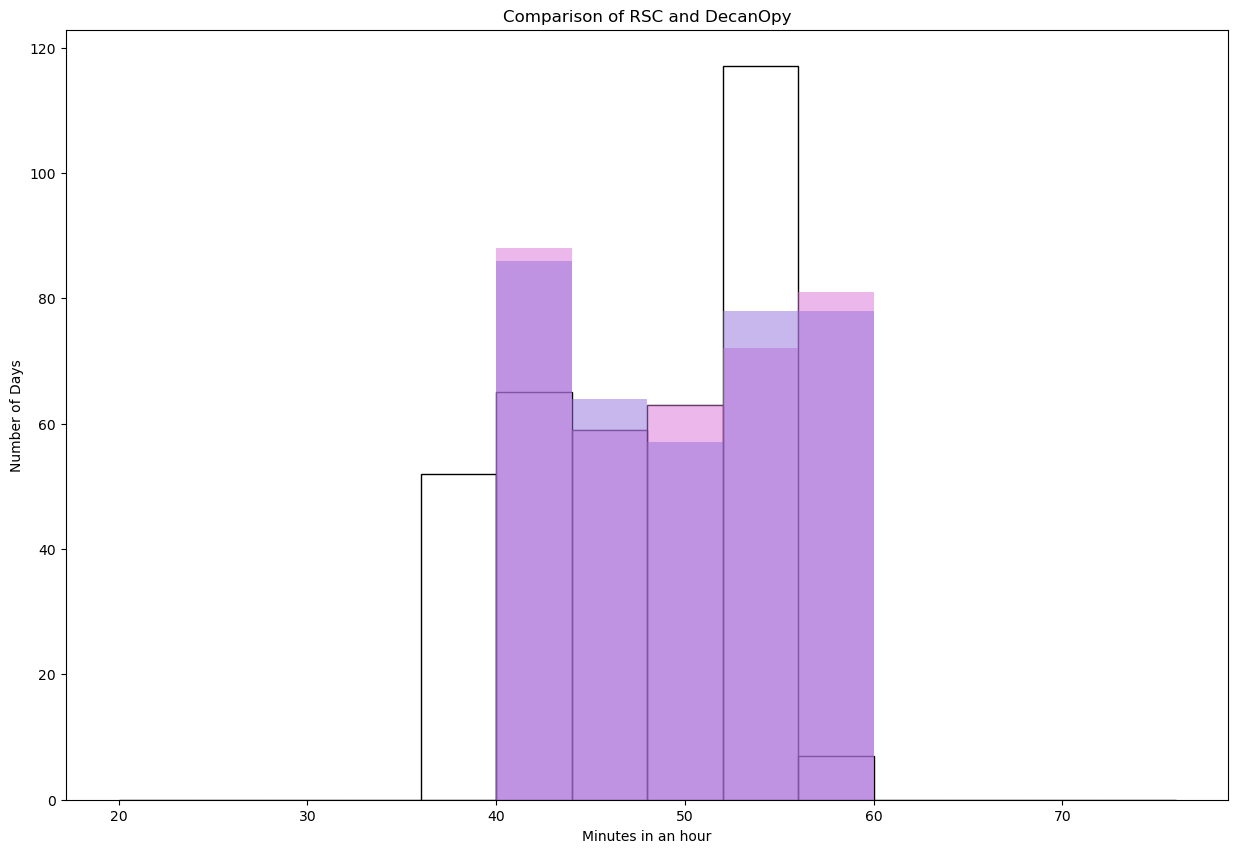

In [61]:
plt.hist(hrlen15, color = "midnightblue", histtype='bar', fill = False, bins=binrange)
plt.hist(hrlenrise10set15, color = "orchid", histtype='bar', bins=binrange,  alpha = 0.5)
plt.hist(hrlenrise15set10, color = "mediumpurple", histtype='bar', bins=binrange, alpha = 0.5)


plt.xlabel("Minutes in an hour")
plt.ylabel("Number of Days")
plt.title("Comparison of RSC and DecanOpy")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

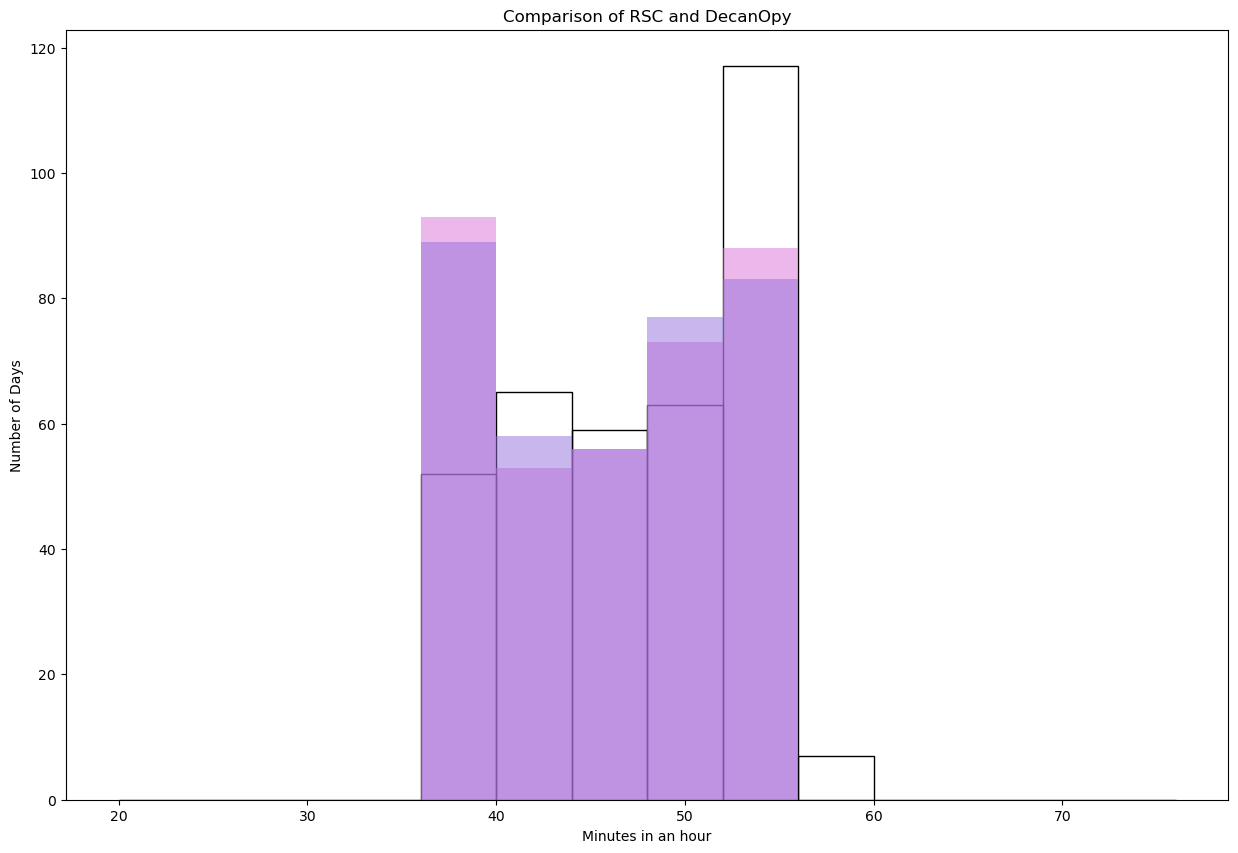

In [62]:
plt.hist(hrlen15, color = "midnightblue", histtype='bar', bins=binrange, fill = False)
plt.hist(hrlenrise15set20, color = "orchid", histtype='bar', bins=binrange, alpha = 0.5)
plt.hist(hrlenrise20set15, color = "mediumpurple", histtype='bar', bins=binrange, alpha =0.5)


plt.xlabel("Minutes in an hour")
plt.ylabel("Number of Days")
plt.title("Comparison of RSC and DecanOpy")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

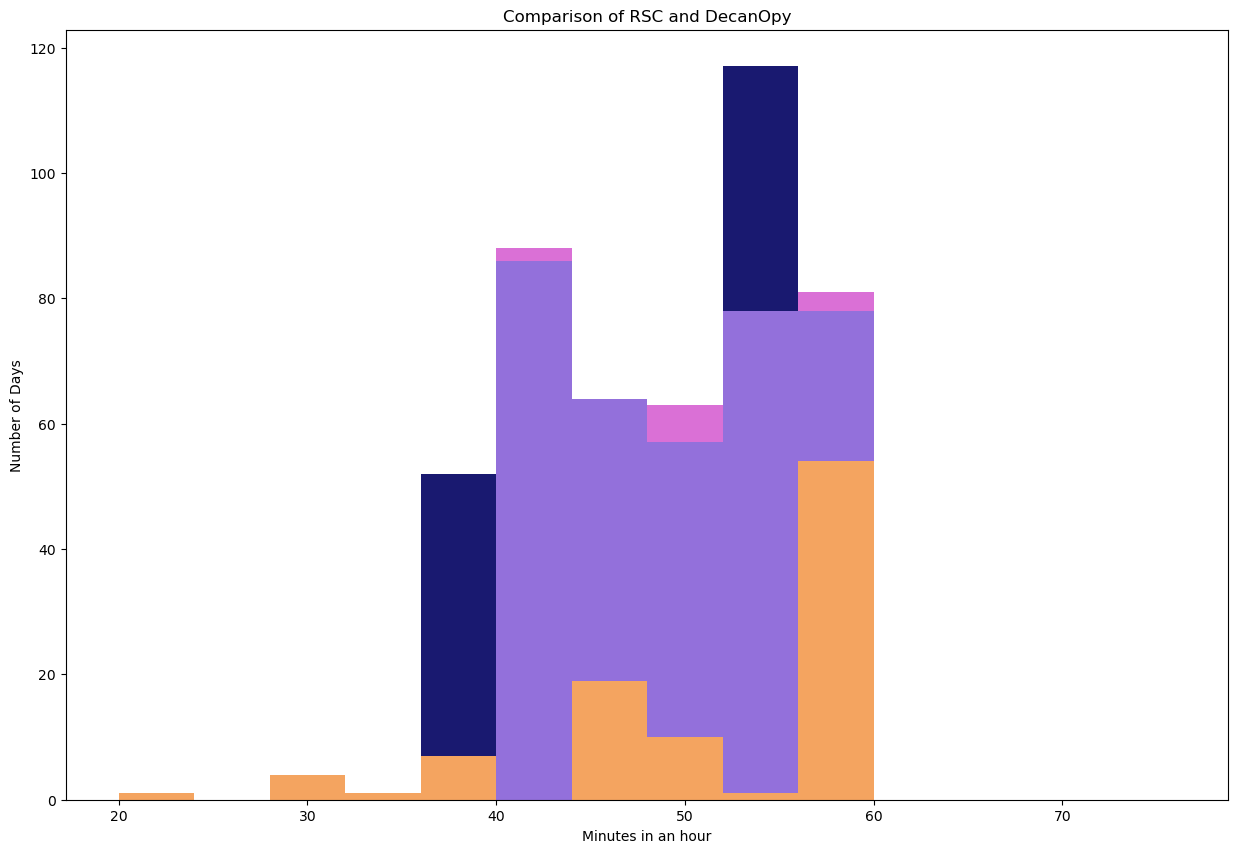

In [63]:
plt.hist(hrlen15, color = "midnightblue", bins=binrange)
plt.hist(hrlenrise10set15, color = "orchid", histtype='bar',bins=binrange)
plt.hist(hrlenrise15set10, color = "mediumpurple", histtype='bar',bins=binrange)
plt.hist(RSCData, color = "sandybrown", bins=binrange)
plt.xlabel("Minutes in an hour")
plt.ylabel("Number of Days")
plt.title("Comparison of RSC and DecanOpy")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

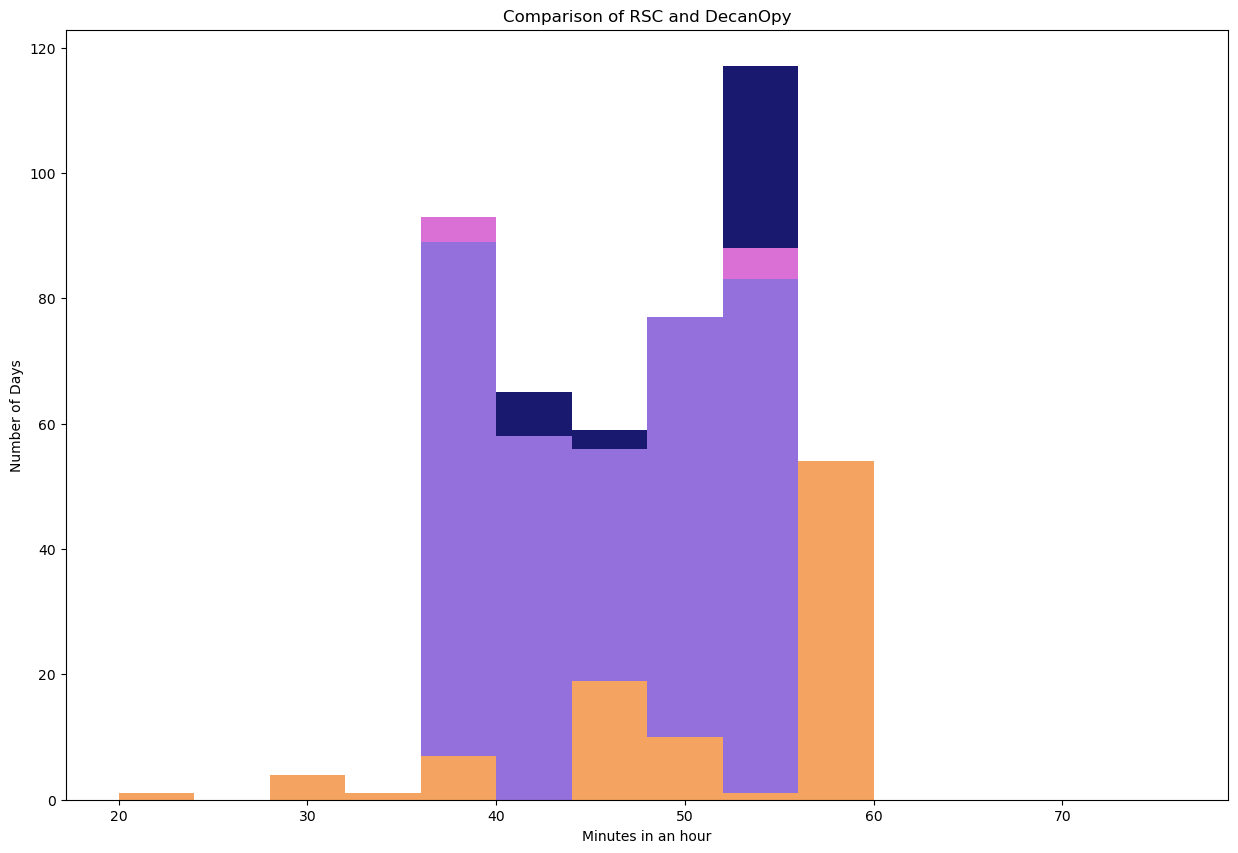

In [64]:
plt.hist(hrlen15, color = "midnightblue", bins=binrange)
plt.hist(hrlenrise15set20, color = "orchid", histtype='bar',bins=binrange)
plt.hist(hrlenrise20set15, color = "mediumpurple", histtype='bar',bins=binrange)
plt.hist(RSCData, color = "sandybrown", bins=binrange)
plt.xlabel("Minutes in an hour")
plt.ylabel("Number of Days")
plt.title("Comparison of RSC and DecanOpy")
plt.show

### A few notes:
- astronomical twilight = -18 degrees
- nautical twilight = -12 degrees
- civil twilight = -6 degrees

<function matplotlib.pyplot.show(close=None, block=None)>

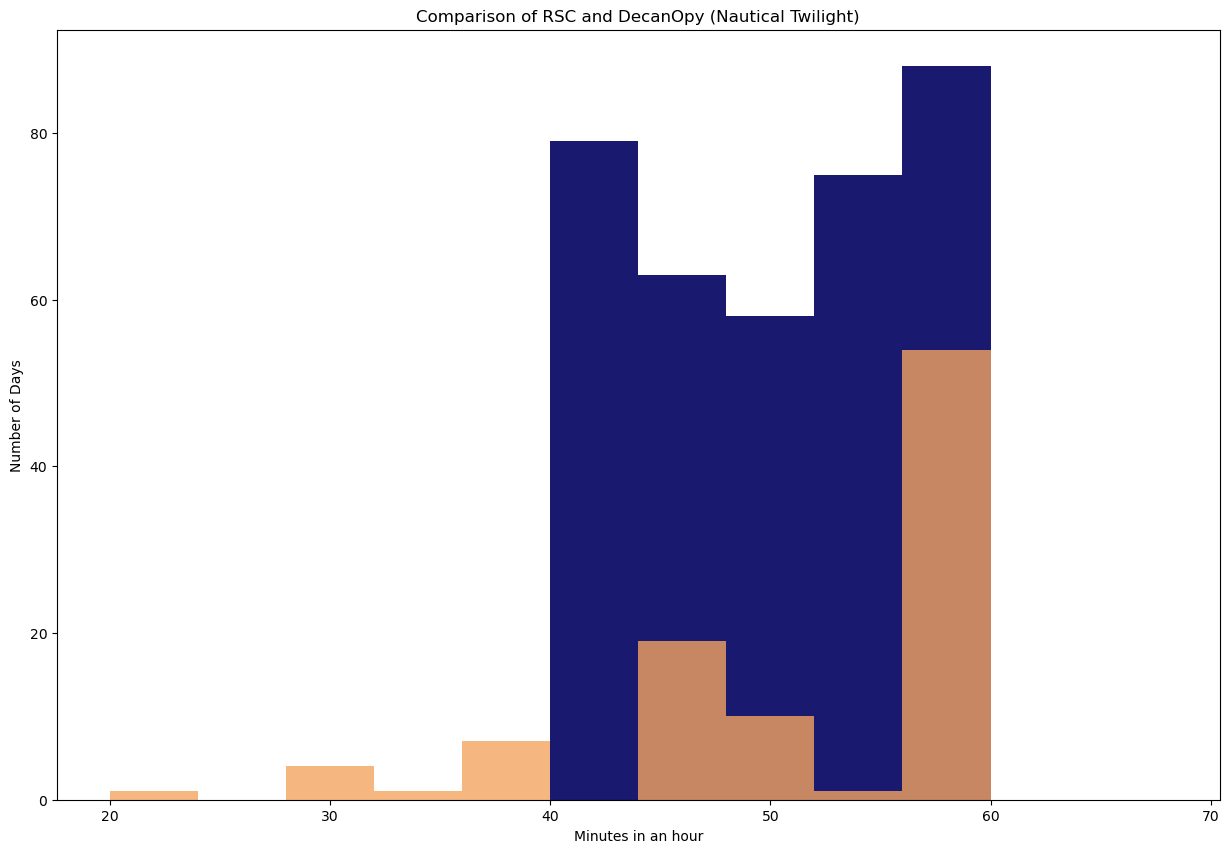

In [65]:

binrange = range(20, 70, 4)

sunriseset12 = SunRiseSet(jd, SunAlt, -12)
hrlen12 = nightHourLength(jd, sunriseset12, sunriseset12) 

plt.hist(hrlen12, color = "midnightblue",  bins=binrange)
plt.hist(RSCData, color = "sandybrown",  bins=binrange, alpha = 0.8)
plt.xlabel("Minutes in an hour")
plt.ylabel("Number of Days")
plt.title("Comparison of RSC and DecanOpy (Nautical Twilight)")
plt.show

## Things to try:


- maybe I should sample once every 15 days to try and compare that?
- do I understand how earlier/later sunrise/sunset changes the skew and why?
- add other years!
- add civil calendar guesstimate!

# Sun Azimuth direction

In [66]:

# use Nautical twilight definition (fits data best)
binrange = range(20, 70, 4)

sunriseset12 = SunRiseSet(jd, SunAlt, -12)
hrlen12 = nightHourLength(jd, sunriseset12, sunriseset12) 

In [67]:
SunAz12 = []
file = open('/Users/lunazagor/Code/GitHub/decanOpy/SunsetAz.txt','w')

# list of sunset azimuths write

for i in range(0, len(sunriseset12)):
    temp = sunriseset12[i][1]
    SunAz12.append(SunAz[temp])
    file.write(str(SunAz[temp])+"\n")
file.close()    

In [68]:
decList = ["Sirius", "Saiph", "Rigel", "Hamal", "Rasalhague", "Shertan"]

In [69]:
# next, I want to fetch sun's az at that altitude and convert to Dec and RA
# actually, I'm just gonna directly fetch the ra since I think that's what I want...
# (and it's apparently easier than converting)



SunRASet = []
SunDecSet = []
test = []

for i in range(0, len(sunriseset12)):
    # make time obejcts for sunrise and sunset
    t_set = Time(sunriseset12[i][1], format='jd')
    # get ra coordinates for setting
    suncoord_set = get_sun(t_set)
    ra_set = Angle(suncoord_set.ra)
    ra_set2 = Angle(ra_set, unit = "deg").rad
    dec_set = Angle(suncoord_set.dec)
    dec_set2 = Angle(dec_set, unit = "deg").rad
    SunRASet.append(ra_set2)
    SunDecSet.append(dec_set2)


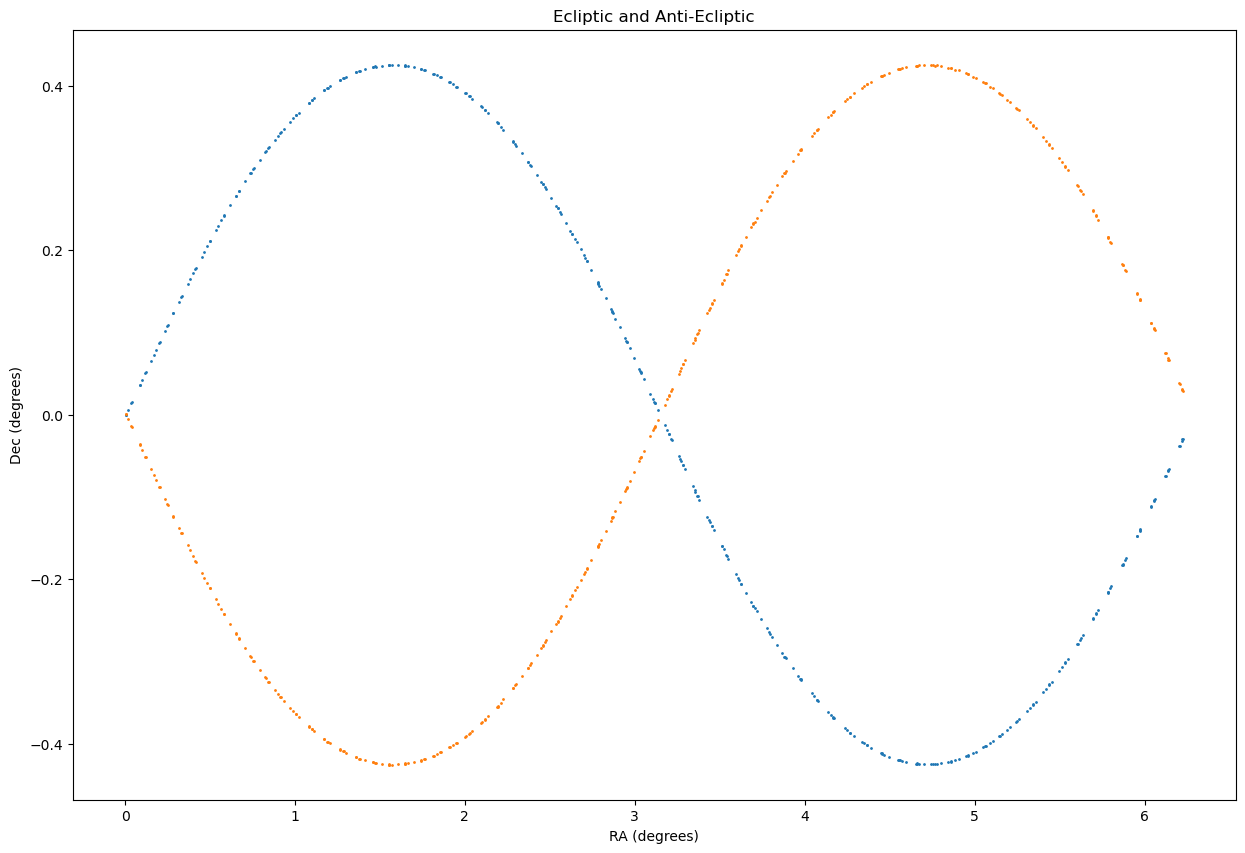

In [70]:
x = range(0, len(SunRASet))
end = -1

plt.scatter(SunRASet[0:end], SunDecSet[0:end], s=1.0)
plt.scatter(np.array(SunRASet[0:end]), -1 * np.array(SunDecSet[0:end]), s=1.0)
#plt.scatter(raSirius, decSirius, marker="*", color="gray")
#plt.scatter(sirRAThen, sirDecThen, marker="*", color="black")
plt.xlabel("RA (degrees)")
plt.ylabel("Dec (degrees)")
plt.title("Ecliptic and Anti-Ecliptic")

plt.show()

In [71]:
# hard-coding information for Northern hemisphere projection
declination_min = -30
declination_max = 90
incrementBy = 10
total_ruler_len = 1
radius_of_circle = (total_ruler_len/2) / math.tan(np.deg2rad(45 - declination_min/2))	

# querry available stars from scsp
star_dict = scsp.finalPositionOfStars(yearSince2000=-3300)
star_names = star_dict.keys()

# set up lists to plot
Dec_rad = []
RA_rad = []

# get x and y vectors to plot
for name in star_names:
    ra_temp = star_dict[name]["RA"].split(".")
    RA_rad.append(Angle(ra_temp[0] + "h" + ra_temp[1] + "m" + ra_temp[2] + "s").deg)

    # is it in the circle 
    dec_temp = star_dict[name]["Declination"]
    dec_ruler_position = radius_of_circle * math.tan(Angle(dec_temp, unit="deg").deg)
    Dec_rad.append(Angle(dec_temp, unit="deg").deg)
    

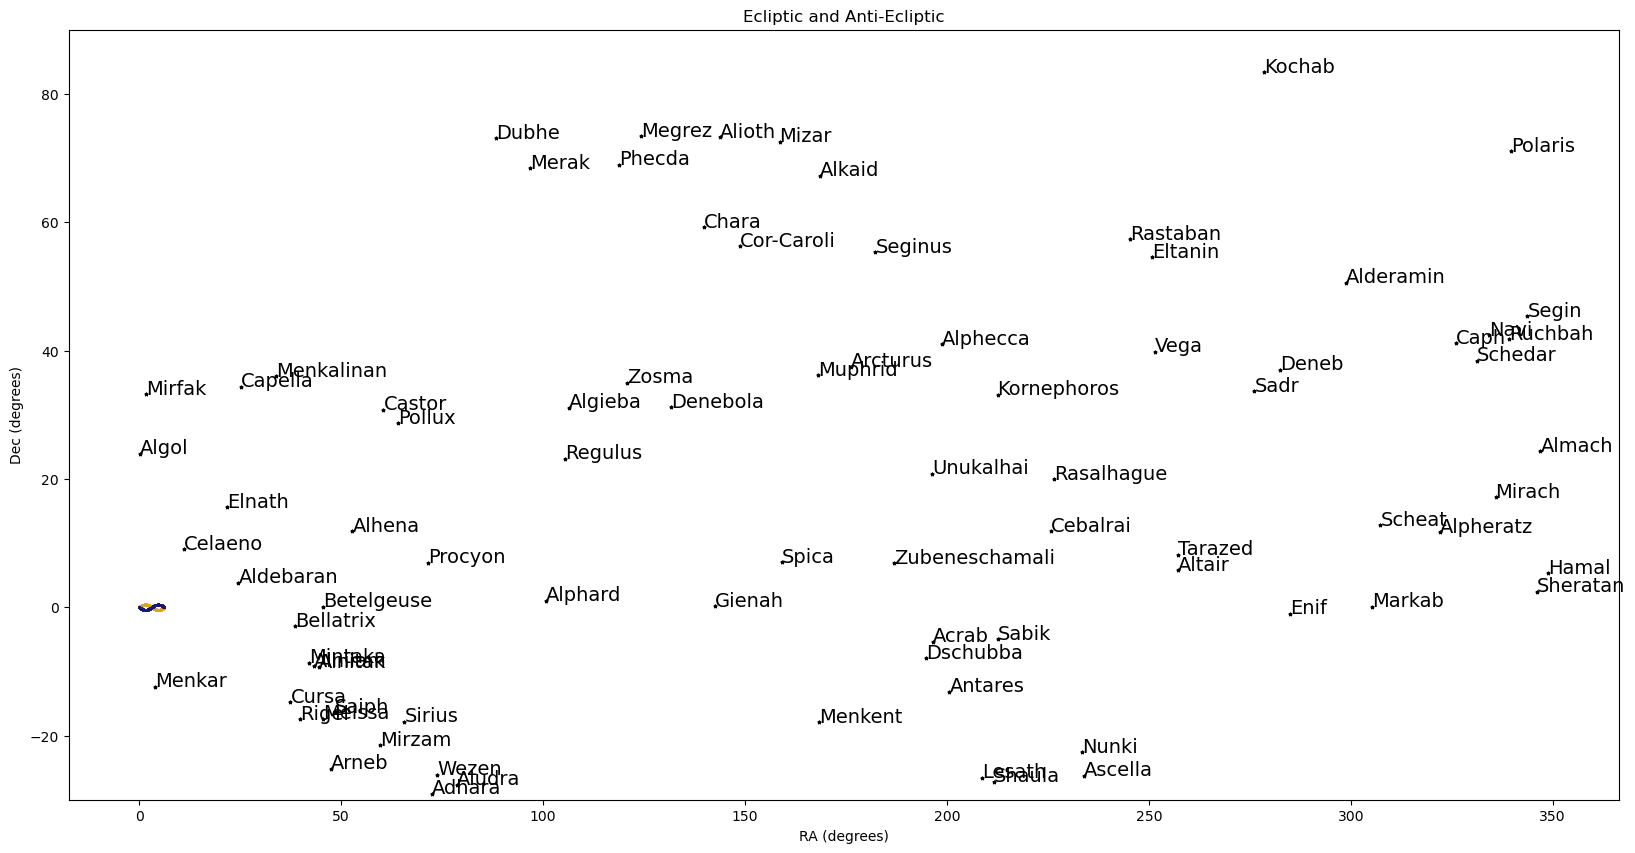

In [72]:
from adjustText import adjust_text

x = range(0, len(SunRASet))
end = -1

plt.rcParams["figure.figsize"] = (20,10)

plt.scatter(SunRASet[0:end], SunDecSet[0:end], s=1.0, c = "goldenrod")
plt.scatter(np.array(SunRASet[0:end]), -1 * np.array(SunDecSet[0:end]), s=1.0, c = "midnightblue")

plt.scatter(RA_rad, Dec_rad, marker="*", color="black", s = 5.0)

for i, label in enumerate(star_names):
    plt.annotate(label, (RA_rad[i], Dec_rad[i]), fontsize = 14)

plt.ylim(declination_min, declination_max)
plt.xlabel("RA (degrees)")
plt.ylabel("Dec (degrees)")
plt.title("Ecliptic and Anti-Ecliptic")

plt.show()

In [75]:
# let's do just the handpicked stars
antiStarList = ["Menkar", "Mintaka", "Cursa", "Saiph", "Meissa", "Rigel", "Sirius", 
                "Arneb", "Mirzam", "Wezen", "Adhara", "Aludra", "Zubeneschamali", 
                "Cebalrai", "Rasalhague", "Scheat", "Alpheratz", "Hamal", "Sheratan"]

# querry available stars from scsp
star_dict_anti = scsp.finalPositionOfStars(antiStarList, yearSince2000=-3300)
star_names_anti = star_dict_anti.keys()

# set up lists to plot
Dec_anti = []
RA_anti = []

# get x and y vectors to plot
for name in star_names_anti:
    ra_temp = star_dict_anti[name]["RA"].split(".")
    RA_anti.append(Angle(ra_temp[0] + "h" + ra_temp[1] + "m" + ra_temp[2] + "s").deg)

    # is it in the circle 
    dec_temp = star_dict_anti[name]["Declination"]
    Dec_anti.append(Angle(dec_temp, unit="deg").deg)
    

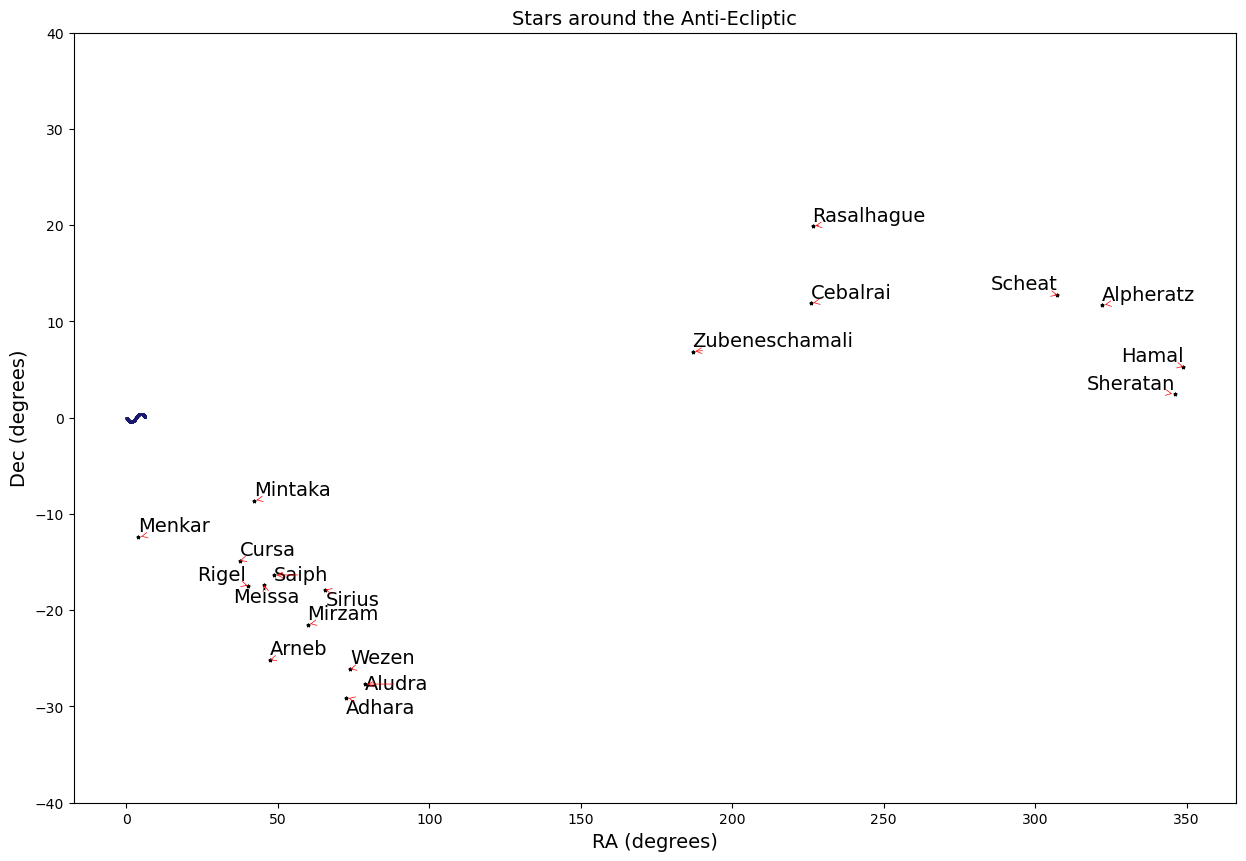

In [76]:
from adjustText import adjust_text


x = range(0, len(SunRASet))
end = -1

plt.rcParams["figure.figsize"] = (15,10)

#plt.scatter(SunRASet[0:end], SunDecSet[0:end], s=1.0, c = "goldenrod")
plt.scatter(np.array(SunRASet[0:end]), -1 * np.array(SunDecSet[0:end]), s=1.0, c = "midnightblue")

plt.scatter(RA_anti, Dec_anti, marker="*", color="black", s = 5.0)

# for i, label in enumerate(star_names_anti):
#     plt.annotate(label, (RA_anti[i], Dec_anti[i]), fontsize = 14)

texts = []
for x, y, s in zip(RA_anti, Dec_anti, star_names_anti):
    texts.append(plt.text(x, y, s, size = 14))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

plt.ylim(-40, +40)
plt.xlabel("RA (degrees)", fontsize=14)
plt.ylabel("Dec (degrees)", fontsize=14)
plt.title("Stars around the Anti-Ecliptic", fontsize=14)

plt.show()

# Scratch

In [ ]:
fig = plt.figure(figsize=(figsize_n,figsize_n), dpi=figsize_dpi)
ax = fig.subplots(subplot_kw={'projection': 'polar'})
plt.scatter(SunRASet, SunDecSet, s=15)

declination_min = -30
declination_max = 90

# Split up chart into North/South hemisphere
# declination_values = np.arange(declination_min, declination_max+1, incrementBy) # +1 to show max value in range

ruler_declination_position = list(ruler_position_dict.values())
ruler_declination_labels = list(ruler_position_dict.keys())
ax.set_ylim(0, 0.5)


#fig.savefig("test.png")
plt.show()

In [ ]:
obj = SkyCoord.from_name("Sirius")#, obstime = Time(sunriseset12[i][0], format='jd' ))
raSirius = obj.ra
decSirius = obj.dec

# WAIT THIS IS SIRIUS TODAY
# WHAT WAS IT THEN??

In [ ]:
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u

ra = Longitude([1, 2, 3], unit=u.deg)  # Could also use Angle
dec = np.array([4.5, 5.2, 6.3]) * u.deg  # Astropy Quantity
c = SkyCoord(ra=ra, dec=dec, obstime=Time(sunriseset12[0][0], format='jd'))

- Ok apparently I need to figure out a way to slot the precession of the equinoxes into the code 
- also, what the heck is up with the figure below?? why do I get several loops of RA??

http://astro.dur.ac.uk/~ams/users/solar_year.html

In [ ]:
star_final_pos_dict = scsp.finalPositionOfStars(userListOfStars=["Sirius"], yearSince2000=-3600)
sirDecThen = star_final_pos_dict["Sirius"]["Declination"]
# sirRAThen = star_final_pos_dict["Sirius"]["RA"]
# sirRAThen = Angle('04h22m45s').degree
tempRA = star_final_pos_dict["Sirius"]["RA"].split(".")
sirRAThen = Angle(tempRA[0] + "h" + tempRA[1] + "m" + tempRA[2] + "s").degree

In [ ]:
tempRA = star_final_pos_dict["Sirius"]["RA"].split(".")
sirRAThen = Angle(tempRA[0] + "h" + tempRA[1] + "m" + tempRA[2] + "s")

In [ ]:
x = range(0, len(SunRASet))
end = -1

plt.scatter(SunRASet[0:end], SunDecSet[0:end])
plt.scatter(np.array(SunRASet[0:end]), -1 * np.array(SunDecSet[0:end]))
plt.scatter(raSirius, decSirius, marker="*", color="gray")
plt.scatter(sirRAThen, sirDecThen, marker="*", color="black")
plt.show()

In [ ]:
# Sirius
(jd, date, SiriusAz, SiriusAlt, SunAz, SunAlt) = ImportDecanData(direct, Sirius_filename[0])

In [ ]:
fig = plt.figure(figsize=(figsize_n,figsize_n), dpi=figsize_dpi)
ax = fig.subplots(subplot_kw={'projection': 'polar'})
plt.scatter(SunRASet[0:-1], SunDecSet[0:-1], s=15)

declination_min = -30
declination_max = 90

# Split up chart into North/South hemisphere
# declination_values = np.arange(declination_min, declination_max+1, incrementBy) # +1 to show max value in range

# ruler_declination_position = list(ruler_position_dict.values())
# ruler_declination_labels = list(ruler_position_dict.keys())
ax.set_ylim(0, 12)


#fig.savefig("test.png")
plt.show()

In [ ]:
import star_chart_spherical_projection as scsp

star_final_pos_dict = scsp.finalPositionOfStars(yearSince2000=-3300)
#scsp.plotStereographicProjection(northOrSouth="North",  yearSince2000=-3300)


In [ ]:
len(star_final_pos_dict)

In [ ]:
fig_plot_title=None
fig_plot_color="C0"
figsize_n=6
figsize_dpi=100
incrementBy = 30
maxMagnitudeFilter = None

In [ ]:
max(ruler_declination_position)

In [ ]:
fig = plt.figure(figsize=(figsize_n,figsize_n), dpi=figsize_dpi)
ax = fig.subplots(subplot_kw={'projection': 'polar'})

declination_min = -30
declination_max = 90

# Split up chart into North/South hemisphere
declination_values = np.arange(declination_min, declination_max+1, incrementBy) # +1 to show max value in range

# Store the ruler positions based on degrees and the ratio of the ruler
ruler_position_dict = scsp.calculateRuler(declination_min, declination_max, incrementBy, "North")

ruler_declination_position = list(ruler_position_dict.values())
ruler_declination_labels = list(ruler_position_dict.keys())
#ax.set_ylim(0, max(ruler_declination_position))
ax.set_ylim(0, 0.5)

ruler_declination_labels = ["{0}°".format(deg) for deg in ruler_declination_labels]
plt.yticks(ruler_declination_position, fontsize=7)
ax.set_yticklabels(ruler_declination_labels)
ax.set_rlabel_position(120) # declination labels position

# Set Right Ascension (astronomical 'longitude') as X (theta of polar plot)
# angles_ra = np.array([0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150,
# 					165, 180, 195, 210, 225, 240, 255, 270, 285, 300,
# 					315, 330, 345])
# plt.xticks(angles_ra * np.pi / 180, fontsize=8)
# labels_ra = np.array(['$0^h$','$1^h$','$2^h$','$3^h$', '$4^h$','$5^h$',
# 					'$6^h$','$7^h$', '$8^h$','$9^h$', '$10^h$',
# 					'$11^h$','$12^h$','$13^h$','$14^h$','$15^h$',
# 					'$16^h$','$17^h$','$18^h$','$19^h$','$20^h$', 
# 					'$21^h$', '$22^h$','$23^h$'])
# ax.set_xticklabels(labels_ra, fontsize=10)

ax.set_title("test")


plt.scatter(SunRASet, SunDecSet, s=15)


#fig.savefig("test.png")
plt.show()



In [ ]:
max(SunDecSet[0:end])

In [ ]:
# convert to x and y values for stars
# scsp.generate_star_chart.generateStereographicProjection()
import pandas as pd

def getStarList(selectStars=[]):
	# generate a star object
	# selectStars only returns a subset of all the stars saved, empty will return all in the star_data.csv file
	# stars: ["name", "RA: HH.MM.SS", Declination DD.SS, Proper Motion Speed (mas/yr), Proper Motion Angle (DD.SS), Magnitude (V, Visual)]
	star_data_list = []
	star_csv_file = 'star_data.csv'  # get file's directory, up one level, /data/star_data.csv
	star_dataframe = pd.read_csv(star_csv_file)
	for index, row in star_dataframe.iterrows():
		if len(selectStars) > 0: # get only a subset of all stars
			if row["Star Name"] in selectStars:
				star_data_list.append(row.tolist())
		else:
			star_data_list.append(row.tolist())
	return star_data_list

In [ ]:
list_of_stars = getStarList([])

finalPositionOfStarsDict = {} # {'Star Name': {"Declination" : Declination (int), "RA": RA (str)}
x_star_labels = []
x_ra_values = []
y_dec_values = []

for star in list_of_stars:
    if maxMagnitudeFilter is None or star[5] < maxMagnitudeFilter: # Optional: Filter out stars with a magnitude greater than maxMagnitudeFilter

        radius_of_circle = scsp.calculateRadiusOfCircle(declination_min, "North")

        # Calculate position of star due to PROPER MOTION (changes RA and Declination over time)
        star_ra, star_declination = calculateRAandDeclinationViaProperMotion(yearSince2000, 
                                                                            star[1], 
                                                                            star[2], 
                                                                            star[3], 
                                                                            star[4])
        # Optional: Calculate new position of star due to PRECESSION (change RA and Declination over time)
        # Vondrak accurate up  +/- 200K years around 2000
        if isPrecessionIncluded:
            star_declination, star_ra = precessionVondrak(star[0], star_ra, star_declination, yearSince2000)

            # convert degree to position on radius
            dec_ruler_position = scsp.calculateLength(star_declination, radius_of_circle, "North") 

            in_range_value = False # Determine if within range of South/North Hemisphere
            if star_declination > declination_min and star_declination < declination_max: # only display stars within range of declination values
                in_range_value = True # North
            if star_declination < declination_min and star_declination > declination_max: # only display stars within range of declination values
                in_range_value = True # South

            if in_range_value:
                finalPositionOfStarsDict[star[0]] = {"Declination" : star_declination, "RA": convertRadianstoRAhr(star_ra)} # {'Star Name': {"Declination" : Declination (int), "RA": RA (str)}
                x_star_labels.append(star[0])
                x_ra_values.append(star_ra)
                y_dec_values.append(dec_ruler_position)

In [ ]:


# Set Right Ascension (astronomical 'longitude') as X (theta of polar plot)
angles_ra = np.array([0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150,
	165, 180, 195, 210, 225, 240, 255, 270, 285, 300,
	315, 330, 345])
plt.xticks(angles_ra * np.pi / 180, fontsize=8)

labels_ra = np.array(['$0^h$','$1^h$','$2^h$','$3^h$', '$4^h$','$5^h$',
	'$6^h$','$7^h$', '$8^h$','$9^h$', '$10^h$',
	'$11^h$','$12^h$','$13^h$','$14^h$','$15^h$',
	'$16^h$','$17^h$','$18^h$','$19^h$','$20^h$', 
	'$21^h$', '$22^h$','$23^h$'])
ax.set_xticklabels(labels_ra, fontsize=10)

# Optional: Label the stars with names
for i, txt in enumerate(x_star_labels):
	ax.annotate(txt, (x_ra_values[i], y_dec_values[i]), 
				horizontalalignment='center', verticalalignment='bottom', 
				fontsize=8)
# for i, txt in enumerate(x_star_labels):
# 	logger.debug("{0}: {1:05f} RA (degrees) and {2:05f} Declination (ruler)".format(txt, np.rad2deg(x_ra_values[i]), y_dec_values[i]))
# 	output_string = "Proper Motion"
# 	logger.debug("{0} for {1} Years\n".format(output_string, yearSince2000))

ax.scatter(x_ra_values, y_dec_values, s=10, c=fig_plot_color)

